In [15]:
import tidy3d as td
import numpy as np
import matplotlib.pyplot as plt
print("Tidy3D version:", td.__version__)



Tidy3D version: 2.8.4


In [16]:
# Define your geometry parameters
gaps = [0.1, 0.2, 0.3, 0.4]   # waveguide-ring gaps in μm
ring_radius = 5.0             # in μm
resolution = 50               # pixels per μm


In [17]:
from tidy3d import Mesh, Structure, ContinuousSource, Simulation, FieldMonitor

# Parameters
domain_size = (20, 10, 0)     # μm
pml_layers = [1.0, 1.0, 0]    # μm in x, y, z
resolution = 50               # pixels/μm
wavelength = 1.55             # μm
gaps = [0.1, 0.2, 0.3, 0.4]    # μm offsets
R = 5.0                       # ring radius

def run_coupling_sim(gap):
    # Create a mesh with PML
    mesh = Mesh(size=domain_size, grid_spacing=1/resolution, pml=pml_layers)

    # Define materials: index 2.0 for Si₃N₄, 1.0 for background
    waveguide = Structure(
        mesh=mesh,
        geometry=[{"type": "block", "material_index": 2,
                   "size": [20, 0.5, 0], "center": [-5, 0, 0]}]
    )
    ring = Structure(
        mesh=mesh,
        geometry=[{"type": "cylinder", "material_index": 2,
                   "radius": R, "center": [gap+R, 0, 0], "height": 0}]
    )

    # Set up sources and monitors
    src = ContinuousSource(wavelength=wavelength, center=[-7, 0, 0], component="Ez")
    m1 = FieldMonitor(center=[8, 0, 0], size=[0, 1, 0], component="Ez")
    m2 = FieldMonitor(center=[gap+R, 0, 0], size=[0, 6, 0], component="Ez")

    sim = Simulation(
        mesh=mesh,
        structures=[waveguide, ring],
        sources=[src],
        monitors=[m1, m2],
        run_time=200
    )
    data = sim.run()
    # Sum field intensities as proxy for power
    wg_power = (data.monitors[0].field**2).sum()
    ring_power = (data.monitors[1].field**2).sum()
    return float(ring_power / (wg_power + ring_power))


ImportError: cannot import name 'Mesh' from 'tidy3d' (C:\Users\soumy\.conda\envs\qc-env\lib\site-packages\tidy3d\__init__.py)

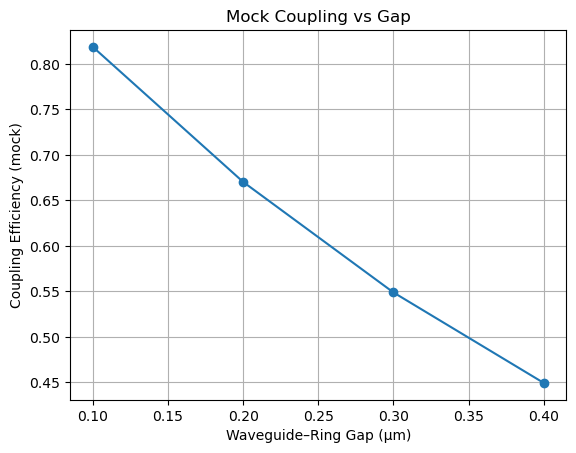

In [18]:
# === Cell 4: Mock Sweep & Plot ===
import numpy as np
import matplotlib.pyplot as plt

# Re‑use gaps and R from Cell 2
# gaps = [0.1, 0.2, 0.3, 0.4]

# Mock coupling function: exponential decay as proxy
def run_coupling_sim(gap):
    alpha = 2.0  # decay rate
    return np.exp(-alpha * gap)

# Run sweep
results = [(g, run_coupling_sim(g)) for g in gaps]
x_vals, y_vals = zip(*results)

# Plot & save
plt.figure()
plt.plot(x_vals, y_vals, 'o-')
plt.xlabel('Waveguide–Ring Gap (μm)')
plt.ylabel('Coupling Efficiency (mock)')
plt.title('Mock Coupling vs Gap')
plt.grid(True)
plt.savefig('coupling_vs_gap_mock.png')
plt.show()
